In [1]:
import matplotlib.pyplot as plt
import numpy as np

# create a sinewave with a frequency of 1Hz
t = np.arange(0, 4, 0.01)
pure = np.sin(2 * np.pi * t)

# add random noise to the sinewave
noise = np.random.normal(0, 0.1, len(t))
noisy = pure + noise

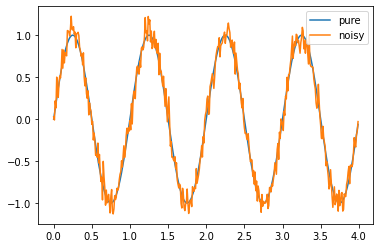

In [2]:
# plot the sinewave
plt.plot(t, pure, label='pure')
plt.plot(t, noisy, label='noisy')
plt.legend()
plt.show()

In [4]:
def derivative(x, y, gain=0.1):
    return np.gradient(y, x) * gain

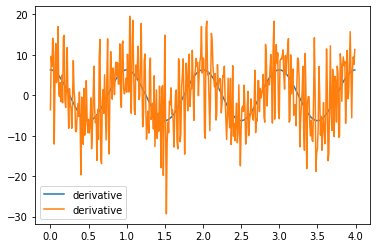

In [5]:
# plot derivative of pure sinewave
plt.plot(t, derivative(t, pure, 1), label='derivative')
# plot derivative of noisy sinewave
plt.plot(t, derivative(t, noisy, 1), label='derivative')
plt.legend()

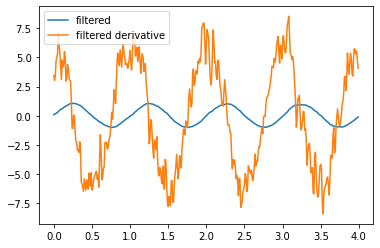

In [6]:
# low pass filter on the noisy sinewave
filtered = np.convolve(noisy, np.ones(10)/10, mode='same')
# plot filtered noisy
plt.plot(t, filtered, label='filtered')
# plot derivative of filtered noisy
plt.plot(t, derivative(t, filtered, 1), label='filtered derivative')
# # plot derivative of original noisy
# plt.plot(t, derivative(t, noisy, 1), label='noisy derivative')

plt.legend()
plt.show()

In [7]:
# Create pseudo-derivative function
def pseudo_derivative(x, y, gain=0.1):
  # apply a low pass filter to x
  filtered = np.convolve(y, np.ones(10)/10, mode='same')
  # now take the derivative of x_filt
  return np.gradient(filtered, x) * gain

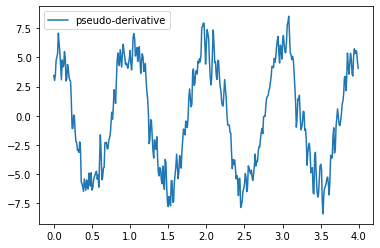

In [8]:
# plot the pseudo-derivative of noisy sinewave
plt.plot(t, pseudo_derivative(t, noisy, 1), label='pseudo-derivative')

# plot derivative of noisy sinewave
# plt.plot(t, derivative(t, noisy, 1), label='derivative')

plt.legend()
plt.show()

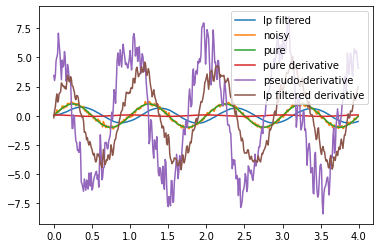

In [13]:
# try a kalman filter on the noisy sinewave

def kalman_filtered(x, kalman_gain=0.05):
  current_value = x[0]
  kalman_output = [current_value]
  for item in x[1:]:
    current_value = current_value + kalman_gain * (item - current_value)
    kalman_output.append(current_value)
  return kalman_output

# plot kalman filtered noisy
plt.plot(t, kalman_filtered(noisy), label='lp filtered')
plt.plot(t, noisy, label='noisy')
plt.plot(t, pure, label='pure')
plt.plot(t, np.gradient(pure), label='pure derivative')
plt.plot(t, pseudo_derivative(t, noisy, 1), label='pseudo-derivative')
# plot derivative of kalman filtered noisy
plt.plot(t, derivative(t, kalman_filtered(noisy), 1), label='lp filtered derivative')
plt.legend()
plt.show()